# Libraries

In [370]:
library(FFTrees)

library(plyr)
library(tidyverse)
library(DT) # dependency
library(ggthemes) # dependency

# Importing data

In [371]:
responses <- read_csv("data/responses.csv")
questions <- read_csv("data/questions.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_integer(),
  edad = col_integer(),
  REGION = col_integer(),
  POND = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  Name = col_character(),
  Type = col_character(),
  Width = col_integer(),
  Decimals = col_integer(),
  Label = col_character(),
  Measure = col_character(),
  Column1 = col_integer()
)


Tidyverse data

In [372]:
data <- responses %>% 
    gather(question, answer, starts_with("P"))

REGION should be a string

In [373]:
data$REGION <- as.character(data$REGION)

# Columns of interest

### Demographics
Each row has demographic data
- `sexo`
- `genero`
- `comuna`
- `REGION`

### Questions' column
- `P1`: Problemas que afectan a los jóvenes
- `P2`: Qué acciones consideras violentas
- `P3`: Causas de violencia en el pololeo
- `P4`: Para ti, qué tan aceptable...
- `P5`: Medios de comunicación
- `P6`: Películas
- `P7`: Programas de televisión
- `P8`: Likert scale
- `P9`: Para cuáles corresponde denunciar

In [374]:
questions %>%
    filter(Name == 'P8_2') %>%
    select(Label)

Label
"Qué tan de acuerdo o en desacuerdo estas con: En algunas ocasiones, las mujeres tienen actitudes que justifican que reciba actos de violencia por parte de su pareja"


In [375]:
questions %>%
    filter(Name == 'P16_8') %>%
    select(Label)

Label
"En su entorno cercano, cuán frecuente es que en las relaciones de pareja de jóvenes de su edad: Pelear o discutir por comentarios que la pareja hizo en Facebook o en otra red social"


# Analysis

In [376]:
count_and_percentage <- function(question) {
    total <- data %>%
                filter(question == !!question) %>%
                nrow

    data %>%
        filter(question == !!question) %>%
        group_by(answer)%>%
        summarize(count = length(answer),
                  percentage = round(count/total*100, 1))
}

In [377]:
count_and_percentage("P17_9")

answer,count,percentage
No aplica,24,2.4
No le ha pasado,706,69.8
No responde,6,0.6
Sí le ha pasado,276,27.3


In [462]:
count_and_percentage_2 <- function(question) {
    
    temp <- data
    
    temp[temp$answer=='Sí le ha pasado', 'answer'] <- ' Sí'
    temp[temp$answer=='No le ha pasado', 'answer'] <- ' No'
    temp[temp$answer!=' Sí' & temp$answer!=' No', 'answer'] <- 'NA/NS/NR'
    
    df1 <- temp %>%
            filter(question == !!question) %>%
            group_by(edad, answer)%>%
            summarize(count = length(answer))
    
    df2 <- df1 %>%
            group_by(edad) %>%
            summarize(edad_count = sum(count))
    
    df3 <- merge(x = df1, y = df2, by = "edad", all.x = TRUE)
    
    df3 %>%
        add_column(percentage = round(df3$count / df3$edad_count * 100 , 2))
}

In [468]:
dat <- count_and_percentage_2("P17_3")

In [470]:
p <- ggplot(data=dat, aes(x=edad, y=percentage, group=answer, colour=answer)) +
        geom_line(size=1) +
        geom_point(size=3, fill="white") +
        expand_limits(y=0) +  
        xlab("Edad") + ylab("Porcentaje") +
        ggtitle("¿Te has alejado de amigos, familiares y compañeros de estudio\n o trabajo para evitar que tu pareja se moleste?") +
        #ggthemes::scale_color_solarized() +
        theme_bw() +
        theme(legend.position=c(.9, .6))

svg("hey.svg")
p
dev.off()

png 
  2

### Count of violence acts

In [222]:
v <- data %>%
        filter(question == 'P17_1' || question == 'P17_2' || question == 'P17_3' || question == 'P17_4' || question == 'P17_5' || question == 'P17_6' || question == 'P17_7' || question == 'P17_8' || question == 'P17_9') %>%
        filter(answer == 'Sí le ha pasado') %>%
        group_by(id, sexo, edad) %>%
        summarize(count = length(answer))

In [226]:
v <- data %>%
        filter(question == 'P17_9') %>%
        filter(answer == 'Sí le ha pasado') %>%
        group_by(id, sexo, edad) %>%
        summarize(count = length(answer))

v

id,sexo,edad,count
8,Mujer,18,1
12,Mujer,20,1
14,Hombre,21,1
25,Hombre,27,1
28,Hombre,18,1
31,Mujer,26,1
32,Mujer,21,1
34,Mujer,19,1
35,Hombre,18,1
38,Hombre,23,1


# FFTrees

In [176]:
fft_data <- data %>%
                add_column(accepts_violence = (data$answer == 'De acuerdo')*1) %>%
                add_column(casa_veraneo = (data$bienes_10 == 'Sí')) %>%
                filter(question == 'P8_2') %>%
                select(edad, sexo, REGION, accepts_violence)

head(fft_data)

edad,sexo,REGION,accepts_violence
22,Hombre,13,0
19,Mujer,8,0
15,Mujer,13,0
23,Hombre,9,0
29,Mujer,4,0
23,Hombre,13,0


In [177]:
fft <- FFTrees(formula = accepts_violence ~.,
               data = fft_data)

Growing FFTs with ifan
Fitting non-FFTrees algorithms for comparison (you can turn this off with comp = FALSE) ...


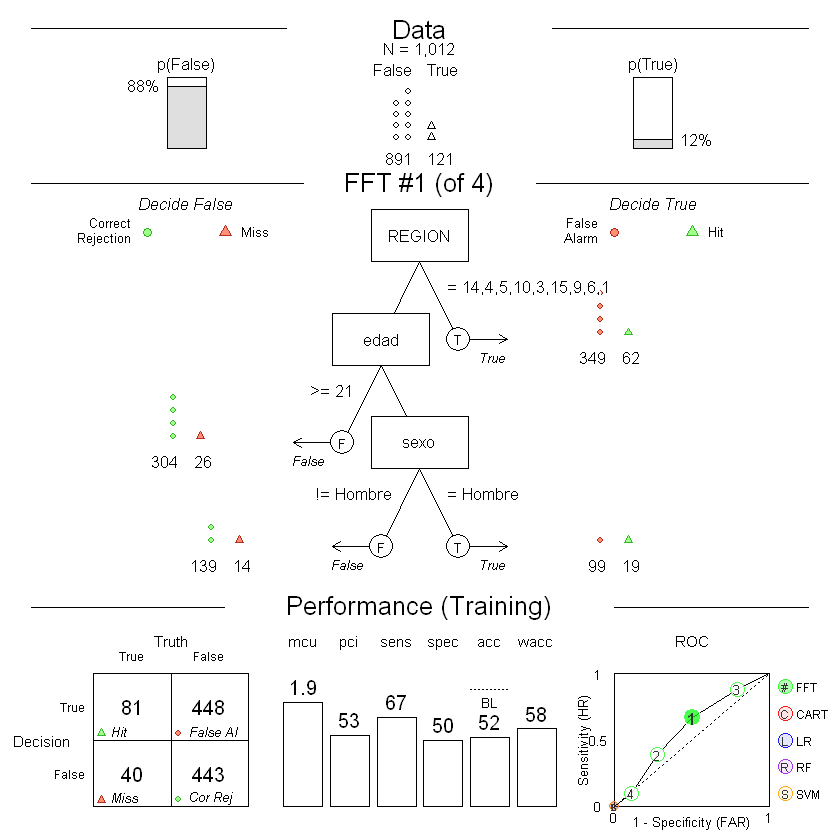

In [179]:
plot(fft, tree=1)